In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
def load_data(image_paths, labels):
    images = []
    for img_path in image_paths:
        img = segment_image_graph_cut(img_path)  # Apply the segmentation
        img_resized = cv2.resize(img, (128, 128))
        images.append(img_resized)

    images = np.array(images) / 255.0  # Normalize the images
    labels = np.array(labels)

    return train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # Assuming 10 different species
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Load your dataset
# image_paths = ['path_to_image1', 'path_to_image2', ...]
# labels = [0, 1, 2, ...]  # Corresponding labels for species
# X_train, X_test, y_train, y_test = load_data(image_paths, labels)

# Data augmentation to improve the model's performance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create and train the model
model = create_cnn_model()
# model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

# Save the model after training
# model.save('wildlife_species_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


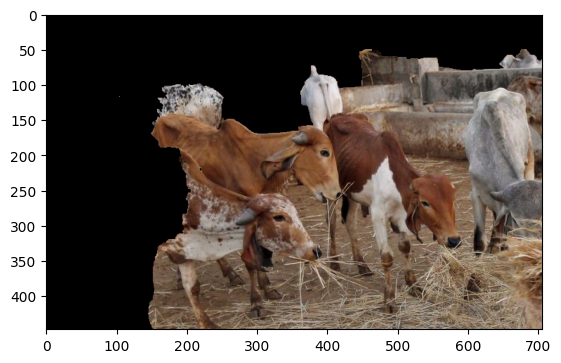

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image_graph_cut(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Check if image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {image_path}")
        return None  # or raise an exception
    mask = np.zeros(img.shape[:2], np.uint8)

    # Background and foreground models
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Define the rectangle around the object (user input could be more dynamic)
    rect = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

    # Apply graph-cut algorithm
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Post-process the mask
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    img = img * mask2[:, :, np.newaxis]

    # Display the segmented image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    return img

# Example usage
segmented_img = segment_image_graph_cut('/content/drive/MyDrive/resources/test/Cow-1-10.png')

In [ ]:
# Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_acc}")